<ipython-input-42-ac1a64382974>:28: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  qc.u3(theta,phi,0,0)


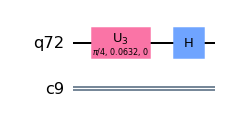

In [42]:
# -*- coding: utf-8 -*-
"""
Created on Sun Nov  8 16:00:19 2020

@author: Antti
"""

import qiskit as qk
from qiskit import IBMQ,Aer
from qiskit import *
from math import pi
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector
from qiskit.tools.visualization import plot_histogram
%matplotlib inline
#IBMQ.enable_account("7dc09d5f4c256c778af9f05a6aff8537cef51554c18822c23e4def65285f306a93f08cde425c73ec9800504501ac8c5c39e5175618cb8e885fba7d225c69bb7a")
my_provider = IBMQ.get_provider()

theta = pi/3
phi = np.random.rand(1)[0]

q = qk.QuantumRegister(1)
c = qk.ClassicalRegister(1)
qc = qk.QuantumCircuit(q,c)

qc.u3(theta,phi,0,0)
qc.h(0)

measureZ=qk.QuantumCircuit(q,c)
measureZ.measure(q,c)
testZ=qc+measureZ 

qc.draw('mpl')


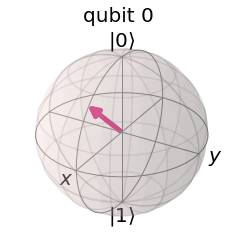

In [43]:

backend = Aer.get_backend('statevector_simulator')
out = qk.execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)


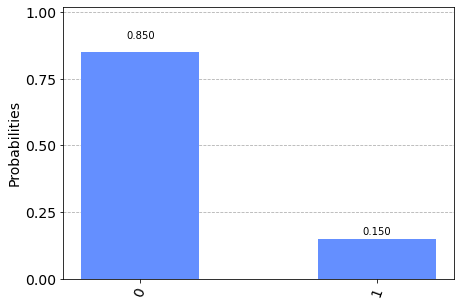

In [44]:

backend=Aer.get_backend('qasm_simulator')
jobIBM=qk.execute(testZ,backend=backend,shots=1024)
resultSim=jobIBM.result()


#I couldn't get the experimental version to work. It always freezes the python kernel
#backend  = my_provider.get_backend('ibmq_ourense')
#jobIBM=qk.execute(testZ,backend=backend,shots=1024)
#resultExp=jobIBM.result()

plot_histogram(resultSim.get_counts(testZ))


Text(0.4, 0.4, 'After Hadamar gate the state is \n $\\frac{1}{\\sqrt{2}} ( (\\sin \\theta + e^{i\\varphi} \\cos \\theta)|0>  +  (\\sin \\theta - e^{i\\varphi} \\cos \\theta) |1> )$ \n And the probability to get |0> is: \n $P(0) = | \\frac{1}{\\sqrt{2}} (\\sin \\theta + e^{i\\varphi} \\cos \\theta)|^2 = \\frac{1}{2} (1 + \\sin(2\\theta) \\cos \\varphi )$ \n Now we get the angle as: \n $\\varphi = \\arccos(\\frac{2P(0) - 1}{\\sin(2\\theta)})$ \n Phi set to 0.063213 and the measured value is 0.796492')

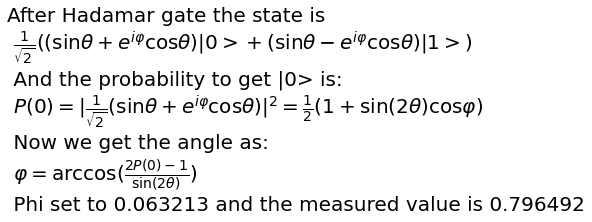

In [45]:
P0 = resultSim.get_counts(testZ)['0']/(resultSim.get_counts(testZ)['0'] + resultSim.get_counts(testZ)['1'])
phi_meas = np.arccos( (2*P0 - 1) / (np.sin(2*theta)) )

state = r'\frac{1}{\sqrt{2}} ( (\sin \theta + e^{i\varphi} \cos \theta)|0>  +  (\sin \theta - e^{i\varphi} \cos \theta) |1> )'
prob_0 = r'P(0) = | \frac{1}{\sqrt{2}} (\sin \theta + e^{i\varphi} \cos \theta)|^2 = \frac{1}{2} (1 + \sin(2\theta) \cos \varphi )'
angle = r'\varphi = \arccos(\frac{2P(0) - 1}{\sin(2\theta)})'
plt.figure(4)
ax = plt.axes([0,0,0,0]) #left,bottom,width,height
ax.axis('off')
plt.text(0.4,0.4,'After Hadamar gate the state is \n $%s$ \n And the probability to get |0> is: \n $%s$ \n Now we get the angle as: \n $%s$ \n Phi set to %f and the measured value is %f' %(state,prob_0, angle, phi, phi_meas) ,size=20,color="black")
